# CIA Factbook Analysis - SQLite & Python

## The Database

We will be working with data from the CIA World Factbook, a collection of every countries' statistics. The database we are using is from [this GitHub repo](https://github.com/factbook/factbook.sql/releases)

## Project Goal

The main goal of this project is to further familiarize ourselves with the Python SQLite workflow. We will acomplish this goal by using the workflow to explore, analyze, and visualize data from the factbook database. Finding the country with the highest population density will be one of the things we are going to do with the workflow.

## Setting up the Enviornment

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3

## Viewing the Database

In [2]:
conn = sqlite3.connect("factbook.db")
cursor = conn.cursor()

query1 = "SELECT * FROM sqlite_master WHERE type = 'table';"
pd.read_sql_query(query1, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


By viewing the database directly, we can see the information of the table that we are going to work with.

## Importing the Table

In [3]:
query2 = "SELECT * FROM facts"
facts_df = pd.read_sql_query(query2, conn)
facts_df

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230.0,652230.0,0.0,3.256434e+07,2.32,38.57,13.89,1.51
1,2,al,Albania,28748.0,27398.0,1350.0,3.029278e+06,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741.0,2381741.0,0.0,3.954217e+07,1.84,23.67,4.31,0.92
3,4,an,Andorra,468.0,468.0,0.0,8.558000e+04,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700.0,1246700.0,0.0,1.962535e+07,2.78,38.78,11.49,0.46
5,6,ac,Antigua and Barbuda,442.0,442.0,0.0,9.243600e+04,1.24,15.85,5.69,2.21
6,7,ar,Argentina,2780400.0,2736690.0,43710.0,4.343189e+07,0.93,16.64,7.33,0.00
7,8,am,Armenia,29743.0,28203.0,1540.0,3.056382e+06,0.15,13.61,9.34,5.80
8,9,as,Australia,7741220.0,7682300.0,58920.0,2.275101e+07,1.07,12.15,7.14,5.65
9,10,au,Austria,83871.0,82445.0,1426.0,8.665550e+06,0.55,9.41,9.42,5.56


## Summary Statistics Calculation

### Min Population

In [4]:
min_query = "SELECT name, MIN(population) FROM facts"
cursor.execute(min_query).fetchall()

[('Antarctica', 0)]

In [5]:
pd.read_sql_query(min_query, conn)

,name,MIN(population)
0,Antarctica,0


Antarct

### Max Population

In [6]:
max_query = "SELECT name, MAX(population) FROM facts"
cursor.execute(max_query).fetchall()

[('World', 7256490011)]

In [7]:
pd.read_sql_query(max_query, conn)

,name,MAX(population)
0,World,7256490011


### Min Pop. Growth

In [8]:
min_pop_growth_q = "SELECT name, MIN(population_growth) FROM facts"
cursor.execute(min_pop_growth_q).fetchall()

[('Holy See (Vatican City)', 0.0)]

In [9]:
pd.read_sql_query(min_pop_growth_q, conn)

,name,MIN(population_growth)
0,Holy See (Vatican City),0.0


### Max Pop. Growth

In [10]:
max_pop_growth_q = "SELECT name, MAX(population_growth) FROM facts"
cursor.execute(max_pop_growth_q).fetchall()

[('South Sudan', 4.02)]

In [11]:
pd.read_sql_query(max_pop_growth_q, conn)

,name,MAX(population_growth)
0,South Sudan,4.02


## Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022017627E10>,
      dtype=object)

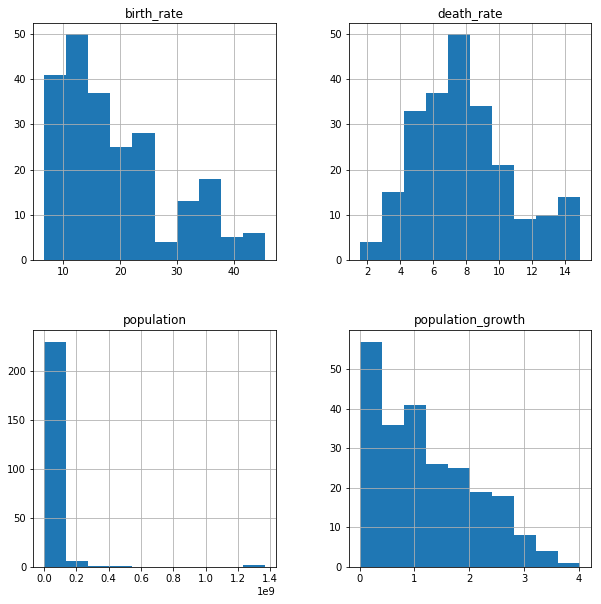

In [12]:
no_outliers_q = "SELECT population, population_growth, birth_rate, death_rate\
                 FROM facts\
                 WHERE (name != 'World') AND (name != 'Antarctica')"
pd.read_sql_query(no_outliers_q, conn).hist(figsize = (10,10))

Although World and Antarctica are in the factbook, they are not countries and are considered outliers. From the histograms, we can see that the range of birth rates are higher than that of death rates. Because we know that the factbook dataframe have population growths under zero, every countries' birth rates are greater than or equal to that of their death rates. Countries with negative population growth must not have been included in this database. We also see that most countries have a population no larger than 0.2 billion and a population growth percentage no larger than 1.

## Country with Highest Pop. Density

In [13]:
high_pop_density_q = "SELECT name, population/area_land as 'Pop_Density'\
                 FROM facts\
                 ORDER BY Pop_Density DESC\
                 LIMIT 1"
pd.read_sql_query(high_pop_density_q, conn)

,name,Pop_Density
0,Macau,21168


## Country with Lowest Pop. Density

In [14]:
low_pop_density_q = "SELECT name, population/area_land as 'Pop_Density'\
                     FROM facts\
                     ORDER BY Pop_Density\
                     LIMIT 1"
pd.read_sql_query(low_pop_density_q, conn)

,name,Pop_Density
0,Ethiopia,None


In [15]:
low_pop_density_q = "SELECT name, population/area_land as 'Pop_Density'\
                     FROM facts\
                     ORDER BY Pop_Density"
pd.read_sql_query(low_pop_density_q, conn)

,name,Pop_Density
0,Ethiopia,NaN
1,South Sudan,NaN
2,Sudan,NaN
3,Holy See (Vatican City),NaN
4,European Union,NaN
5,Ashmore and Cartier Islands,NaN
6,Coral Sea Islands,NaN
7,Heard Island and McDonald Islands,NaN
8,Clipperton Island,NaN
9,French Southern and Antarctic Lands,NaN


Population density is defined as population/land area. The only we can get NaN values is when the land area value is 0, but there is no such thing as a country with no land. Looking at the countries with NaN, most of these countries are not countries. For example, we have the European Union and the Indian Ocean. If we ignore the countries with NaN, Greenland would be the country with the lowest population density.

In [19]:
true_low_pop_density = "SELECT name, population/area_land 'Pop_Density'\
                        FROM facts\
                        WHERE Pop_Density IS NOT NULL\
                        ORDER BY Pop_Density\
                        LIMIT 1"
pd.read_sql_query(true_low_pop_density, conn)

,name,Pop_Density
0,Greenland,0


## Histogram of Pop. Density

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022017D4F8D0>]],
      dtype=object)

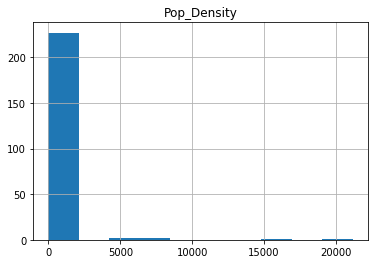

In [17]:
pop_density_q = "SELECT name, population/area_land 'Pop_Density'\
                 FROM facts\
                 WHERE Pop_Density IS NOT NULL"
pd.read_sql_query(pop_density_q, conn).hist()

## Highest Ratios of Water to Land

In [26]:
high_WL_q = "SELECT name, area_water/area_land 'Water_Land_Ratio'\
             FROM facts\
             WHERE Water_Land_Ratio IS NOT NULL\
             ORDER BY Water_Land_Ratio DESC"   
pd.read_sql_query(high_WL_q, conn)

,name,Water_Land_Ratio
0,British Indian Ocean Territory,905
1,Virgin Islands,4
2,Afghanistan,0
3,Albania,0
4,Algeria,0
5,Andorra,0
6,Angola,0
7,Antigua and Barbuda,0
8,Argentina,0
9,Armenia,0


British indian ocean territory has the highest water to land ratio while western sahara has the lowest water to land ratio.

## Conclusion

Although this project did not have any interesting insights, it was a good way to familiarize myself with MySqlite Python Workflow. I definitely feel a bit more confident using the workflow.